In [153]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
data = pd.merge(clinical_df, mouse_df, on=["Mouse ID", "Mouse ID"], how="left")

# Display the data table for preview
data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [55]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_response = data.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"]

# Convert to DataFrame
tumor_response_df = pd.DataFrame(tumor_response)
tumor_response_df = tumor_response_df.reset_index()
# Preview DataFrame
# pd.set_option("display.max_rows", None)
tumor_response_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [259]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# standard_errors = [sem(i) for i in data["Tumor Volume (mm3)"]]


# Convert to DataFrame
standard_error_df = pd.DataFrame({
    "Drug": data["Drug"],
    "Timepoint": data["Timepoint"],
    "Tumor Volume (mm3)": data["Tumor Volume (mm3)"]
})

# Preview DataFrame
standard_error_df = standard_error_df.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]
standard_error_df = standard_error_df.reset_index()
# standard_error_df = pd.DataFrame(standard_error_df)
standard_error_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [262]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked
standard_error_table = standard_error_df.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
standard_error_table.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [54]:
#tumor_response_df= tumor_response_df.reset_index()
table_mean = tumor_response_df.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
table_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


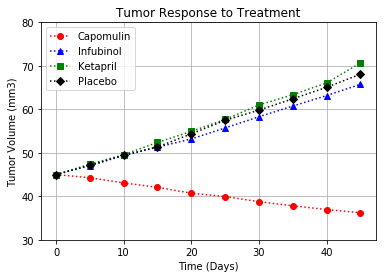

In [263]:
# Generate the Plot (with Error Bars)
#x_axis = np.arange(0, 46, 1)
plt.plot(table_mean["Capomulin"], color="r", marker="o", ls="dotted")
plt.plot(table_mean["Infubinol"], color="b", marker="^", ls="dotted")
plt.plot(table_mean["Ketapril"], color="g", marker="s", ls="dotted")
plt.plot(table_mean["Placebo"], color="k", marker="D", ls="dotted")
# Save the Figure
plt.ylim(30, 80)
plt.grid()
plt.legend()
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Metastatic Response to Treatment

In [74]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastic_sites = data["Metastatic Sites"]

# Convert to DataFrame
metastatic_response_df = pd.DataFrame({
    "Drug": data["Drug"],
    "Timepoint": data["Timepoint"],
    "Metastatic Sites": metastic_sites
})

# Preview DataFrame

metastatic_response_df.groupby(["Drug", "Timepoint"]).mean().head()
#metastatic_response_df



Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [11]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame
metastatic_SEM_df = pd.DataFrame({
    "Drug": data["Drug"],
    "Timepoint": data["Timepoint"],
    "Metastatic Sites": data["Metastatic Sites"]
})
# Preview DataFrame
metastatic_SEM_df = metastatic_SEM_df.groupby(["Drug", "Timepoint"]).sem()
metastatic_SEM_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [298]:
# Minor Data Munging to Re-Format the Data Frames
met_df = pd.DataFrame({
    "Drug": data["Drug"],
    "Timepoint": data["Timepoint"],
    "Metastatic Sites": data["Metastatic Sites"]
})

met_df = met_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean()

# Preview that Reformatting worked
#met_df = met_df.reset_index()
#table_ste = met_df.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

#table_ste.head()
met_df.head()

Drug       Timepoint
Capomulin  0            0.000000
           5            0.160000
           10           0.320000
           15           0.375000
           20           0.652174
Name: Metastatic Sites, dtype: float64

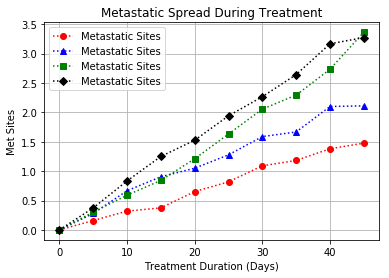

In [299]:
# Generate the Plot (with Error Bars)
plt.plot(met_df["Capomulin"], color="r", marker="o", ls="dotted")
plt.plot(met_df["Infubinol"], color="b", marker="^", ls="dotted")
plt.plot(met_df["Ketapril"], color="g", marker="s", ls="dotted")
plt.plot(met_df["Placebo"], color="k", marker="D", ls="dotted")
# Save the Figure

# Show the Figure
#plt.ylim(0, 4)
plt.grid()
plt.legend()
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met Sites")
plt.show()

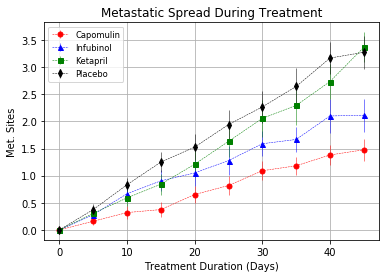

## Survival Rates

In [157]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_survival = data.groupby(["Drug", "Timepoint"]).count()["Mouse ID"]

# Convert to DataFrame
mouse_df = pd.DataFrame(mouse_survival)
mouse_df = mouse_df.reset_index()
# Preview DataFrame
mouse_df = mouse_df.rename(columns={"Mouse ID": "Mouse Count"})
mouse_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [119]:
# Minor Data Munging to Re-Format the Data Frames
mouse_table = mouse_df.pivot(index="Timepoint", columns="Drug")["Mouse Count"]
# Preview the Data Frame
mouse_table

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


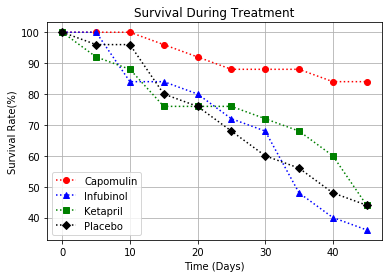

In [118]:
# Generate the Plot (Accounting for percentages)
plt.plot(mouse_table["Capomulin"] / 25 * 100, color="r", marker="o", ls="dotted")
plt.plot(mouse_table["Infubinol"] / 25 * 100, color="b", marker="^", ls="dotted")
plt.plot(mouse_table["Ketapril"] / 25 * 100, color="g", marker="s", ls="dotted")
plt.plot(mouse_table["Placebo"] / 25 * 100, color="k", marker="D", ls="dotted")
# Save the Figure

# Show the Figure
#plt.ylim(30, 105)
plt.grid()
plt.legend()
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate(%)")
plt.show()

## Summary Bar Graph

In [231]:
(mouse_df.groupby("Drug")["Mouse Count"].min() - mouse_df.groupby("Drug")["Mouse Count"].max()) / 10 *100

Drug
Capomulin    -40.0
Ceftamin    -120.0
Infubinol   -160.0
Ketapril    -140.0
Naftisol    -120.0
Placebo     -140.0
Propriva    -190.0
Ramicane     -50.0
Stelasyn    -150.0
Zoniferol   -110.0
Name: Mouse Count, dtype: float64

In [234]:
# Calculate the percent changes for each drug
mouse_summary = (mouse_df.groupby("Drug")["Mouse Count"].min() - mouse_df.groupby("Drug")["Mouse Count"].max()) / mouse_df.groupby("Drug")["Mouse Count"].count()

# Display the data to confirm
mouse_summary

Drug
Capomulin   -0.4
Ceftamin    -1.2
Infubinol   -1.6
Ketapril    -1.4
Naftisol    -1.2
Placebo     -1.4
Propriva    -1.9
Ramicane    -0.5
Stelasyn    -1.5
Zoniferol   -1.1
Name: Mouse Count, dtype: float64

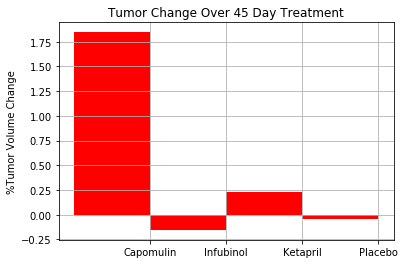

In [195]:
# Store all Relevant Percent Changes into a Tuple
drug_list = [mouse_summary["Capomulin"], mouse_summary["Infubinol"], mouse_summary["Ketapril"], mouse_summary["Placebo"]]
x_axis = np.arange(len(drug_list))

# Splice the data between passing and failing drugs
plt.bar(x_axis, drug_list, color='r', alpha=1, align="edge", width=-1)

# Orient widths. Add labels, tick marks, etc. 
tick_locations = list(x_axis)
plt.xticks(tick_locations, ["Capomulin", "Infubinol", "Ketapril", "Placebo"])
# Use functions to label the percentages of changes
plt.grid()
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("%Tumor Volume Change")
# Call functions to implement the function calls


# Save the Figure


# Show the Figure
plt.show()

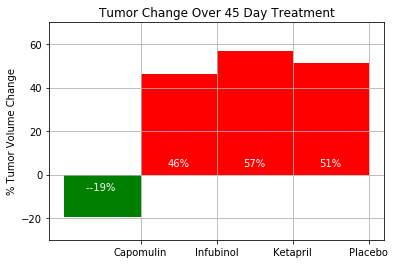

Observable Trends:

1) It's clear that the drug, Capomulin is the most effective in this study.
2) Infubinol showed some promise in that it started out strong. The first five days of the test there were no casualties, but then it showed the steepest drop off.
3) All of the drugs except for Capomulin showed trends very similar to the Placebo, indicating that they didn't do 